In [ ]:
import sys, os
pwd = '/home/hgowda/projects/phishing'
data_dir = os.path.join(pwd, 'data')
dirs = {
    'phishes': os.path.join(dataset_dir, 'datasets/clean/phishes'),
    'benigns': os.path.join(dataset_dir, 'datasets/clean/benigns'),
}

seed = 42

srcpath = os.path.abspath(os.path.join('..', 'source'))
sys.path.append(srcpath)

Number of cleaned data points

In [2]:
n_phishes = len(os.listdir(dirs['phishes']))
n_benigns = len(os.listdir(dirs['benigns']))

print(f"Number of cleaned phishing data: {n_phishes}")
print(f"Number of cleaned benign data: {n_benigns}")

Number of cleaned phishing data: 189084
Number of cleaned benign data: 318105


Collect date details

phishes history starts on: 2024-07-01 00:00:00
Number of prehistoric phishes: 6149, which is  0.03 of all phishes


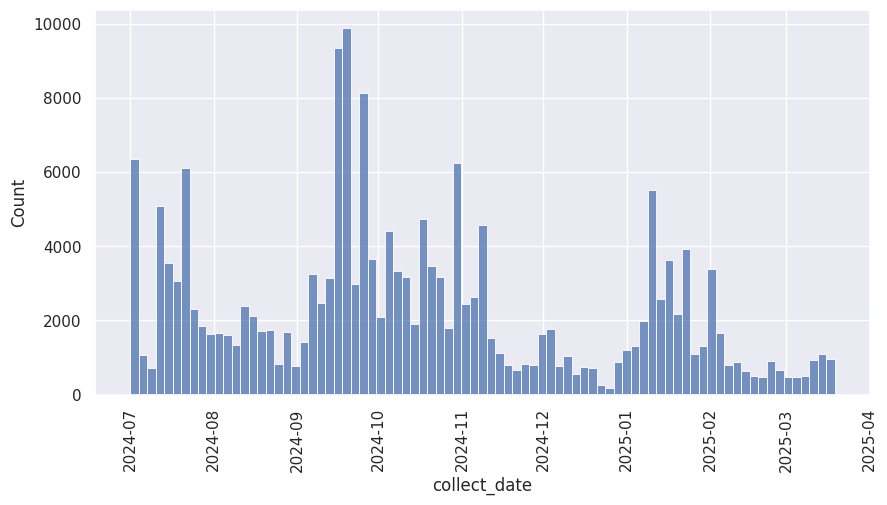

In [3]:
import importlib
import splitutils
importlib.reload(splitutils)
from splitutils import load_df, time_analysis

class_type = 'phishes'

df, zero_day = load_df(dirs[class_type])
exclude_zero_day = False
time_analysis(df, zero_day, class_type, exclude_zero_day)

  Total benigns: 318105
  df len after merge: 318105
  df len before calling save_splits: 318105
benigns history starts on: 2024-07-30 00:00:00
Number of prehistoric benigns: 139336, which is  0.44 of all benigns


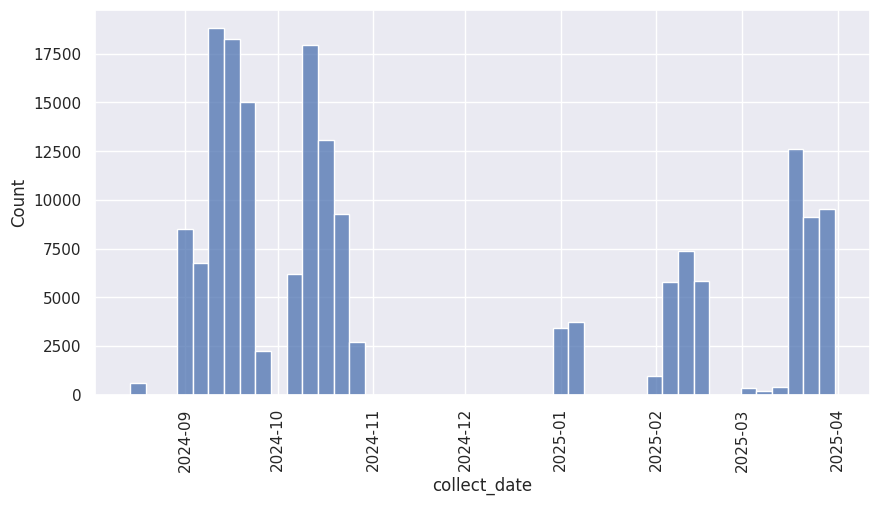

In [ ]:
import importlib
import splitutils
importlib.reload(splitutils)
from splitutils import load_df, time_analysis

class_type = 'benigns'

df, zero_day = load_df(dirs[class_type])
exclude_zero_day = True
time_analysis(df, zero_day, class_type, exclude_zero_day)

Train & test details

- Similarity filtering

In [3]:
nn_paths = {
    'url': {
        'phishes': '/home/hgowda/projects/phishing/data/splitting/nn/url_phishes2.pkl',
        'benigns': '/home/hgowda/projects/phishing/data/splitting/nn/url_benigns.pkl'
    },
    'html': {
        'phishes': '/home/hgowda/projects/phishing/data/splitting/nn/html_phishes2.pkl',
        'benigns': '/home/hgowda/projects/phishing/data/splitting/nn/html_benigns.pkl'
    }
}

dist_thresholds = {
    'url': {'phishes': 0.1, 'benigns': 0.1},
    'html': {'phishes': 0.2, 'benigns': 0.08},
}

>>- phish

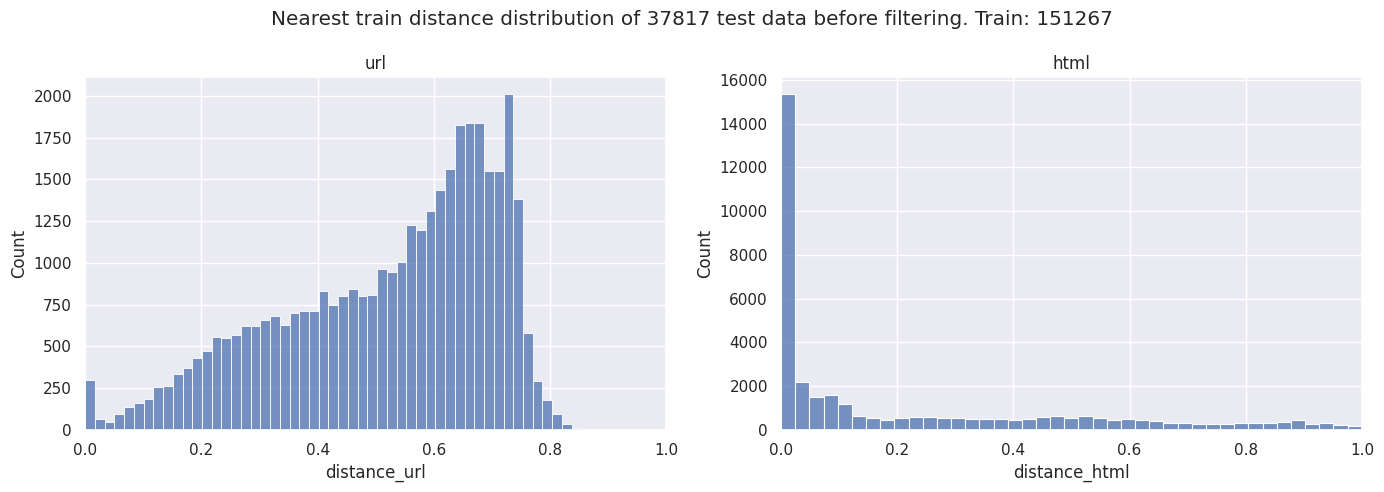

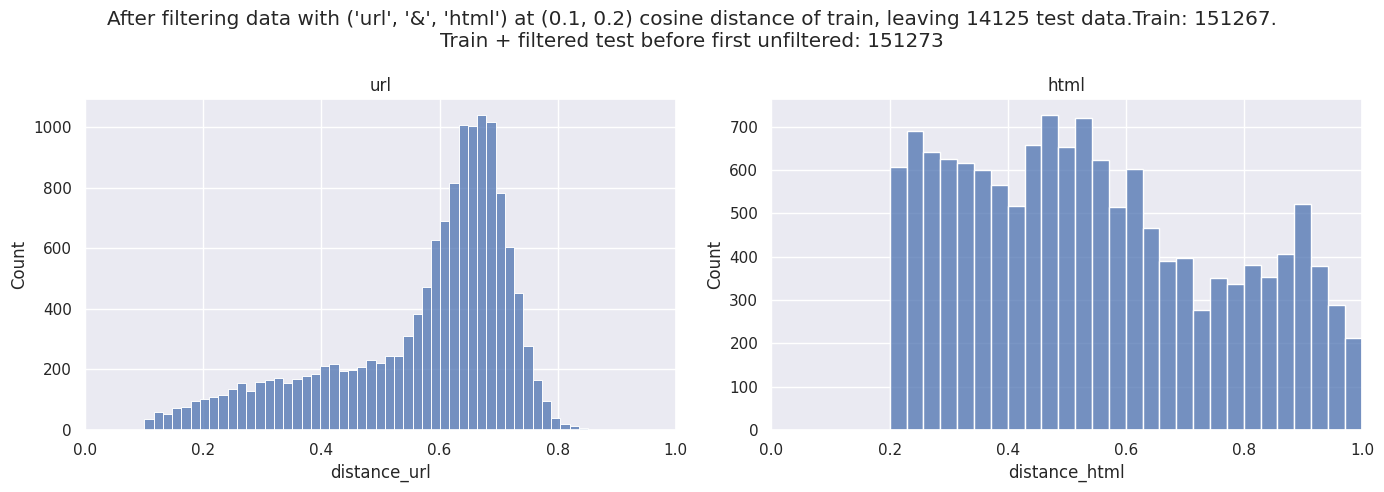

In [4]:
import importlib
import splitutils
importlib.reload(splitutils)
from splitutils import load_df, show_distributions

class_type = 'phishes'
df, zero_day = load_df(dirs[class_type])
n_total = len(df)
train_ratio = 0.8
nearby_df = show_distributions(class_type, n_total, train_ratio, nn_paths, dist_thresholds)


In [5]:
import pandas as pd

threshs = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24]
n_samples = 100
train_size = int(len(df) * 0.8)

samples = None
for thresh in threshs:
    sample_nearby = (
        nearby_df[nearby_df.distance_html <= thresh]
        .sort_values('distance_html', ascending=False)
        .head(n_samples)[['idx', 'nearest_bin_html', 'distance_html']]
    )
    sample_nearby.columns = ['test_idx', 'train_idx', 'distance_html']
    sample_nearby.test_idx = sample_nearby.test_idx + train_size

    sample_nearby['test_json'] = sample_nearby.apply(lambda x: df.loc[x.test_idx, 'sha256'], axis=1)
    sample_nearby['train_json'] = sample_nearby.apply(lambda x: df.loc[x.train_idx, 'sha256'], axis=1)

    sample_nearby['threshold'] = [thresh] * len(sample_nearby)

    if samples is None:
        samples = sample_nearby
    else:
        samples = pd.concat([samples, sample_nearby])
samples = samples.reset_index(drop=True)

samples

,test_idx,train_idx,distance_html,test_json,train_json,threshold
0,153736,598,0.039976,5824ec4779daa71d5698a09f88d58673e30438a3e89b6a...,ba28a1507526e97bab10313e35d15ba5b5d20236034bf4...,0.04
1,153654,598,0.039976,c547ece5e875625613149f2030d93521ea98a9ae365751...,ba28a1507526e97bab10313e35d15ba5b5d20236034bf4...,0.04
2,153483,598,0.039976,edb36aa986fe5abd843524a8e4f4b92eb5bc4c7533fdb4...,ba28a1507526e97bab10313e35d15ba5b5d20236034bf4...,0.04
3,180792,148699,0.039958,ed3eced6e4c09f40d990c9a2dc92e5aff6a08418ec02b8...,d55e6b01b9aa85c1b60ca38e74d6c73fddbacd246f990f...,0.04
4,188817,130558,0.039923,c94e372a5431c1fa51a1d98c98647905e57a5398d74b59...,6830479c1c3107bebfe6e024cf85aef51acd14a8fde117...,0.04
...,...,...,...,...,...,...
595,161448,151116,0.236032,f45504ee0ea3eac2dfab3d3d2b1d957d680ac8eb3a9483...,a20368a593166c7cb8b61d2c1cf1fbffc10c7a19978b1f...,0.24
596,161126,151116,0.236032,b4dcb58af97de4f0c1d286f67008d3ebacbf88282dcd9d...,a20368a593166c7cb8b61d2c1cf1fbffc10c7a19978b1f...,0.24
597,161149,151116,0.236032,dbeda3f5ab1b94eec0f54bdc16fbbe3e2c7bbb1f9c12ef...,a20368a593166c7cb8b61d2c1cf1fbffc10c7a19978b1f...,0.24
598,161169,151116,0.236032,b0be7af7a25cf63178c5af2bba9a68f0748dba05179e64...,a20368a593166c7cb8b61d2c1cf1fbffc10c7a19978b1f...,0.24


In [6]:
import os
import json
import Levenshtein

def get_html(path):
    with open(path) as f:
        html = json.load(f)
    content = 'html_content' if 'html_content' in html.keys() else 'content'
    return html[content]

def get_distance(params):
    test_path, train_path = params
    
    test_html = get_html(test_path)
    train_html = get_html(train_path)

    return Levenshtein.ratio(test_html, train_html)

In [7]:
import multiprocessing as mp

params = []
for row in samples.iterrows():
    params.append((
        os.path.join(dirs[class_type], row[1].test_json + '.json'), 
        os.path.join(dirs[class_type], row[1].train_json + '.json')
    ))

with mp.Pool(72) as pool:
    lrs = pool.map(get_distance, params)

samples['levenshtein_ratio'] = lrs

samples.to_csv(f'{class_type}.csv')

>>- benign

  Total benigns: 318105
  df len after merge: 318105
  df len before calling save_splits: 318105


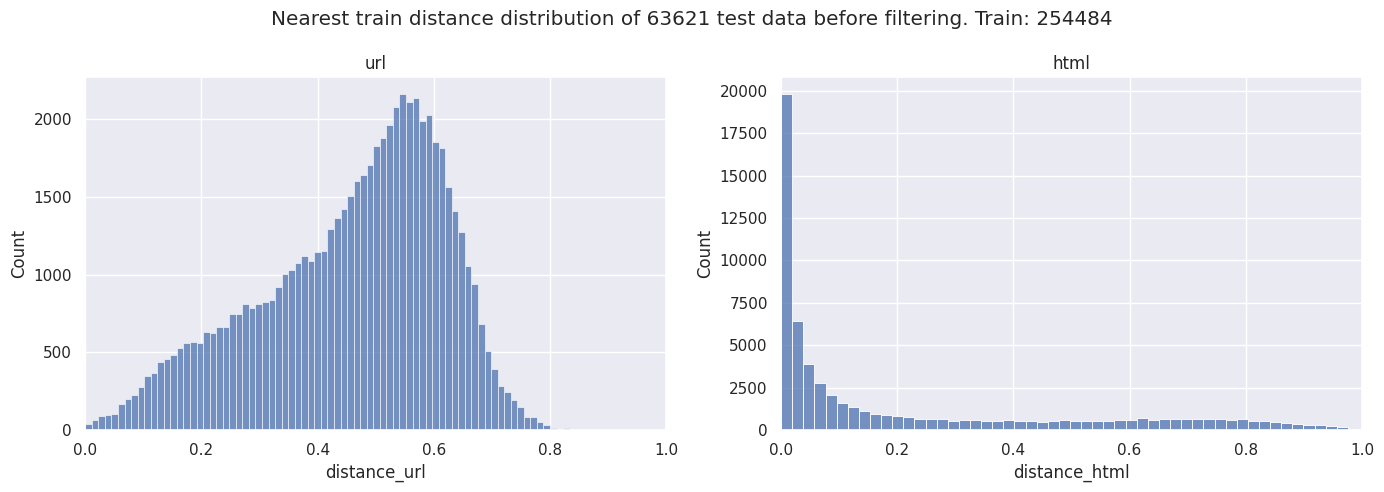

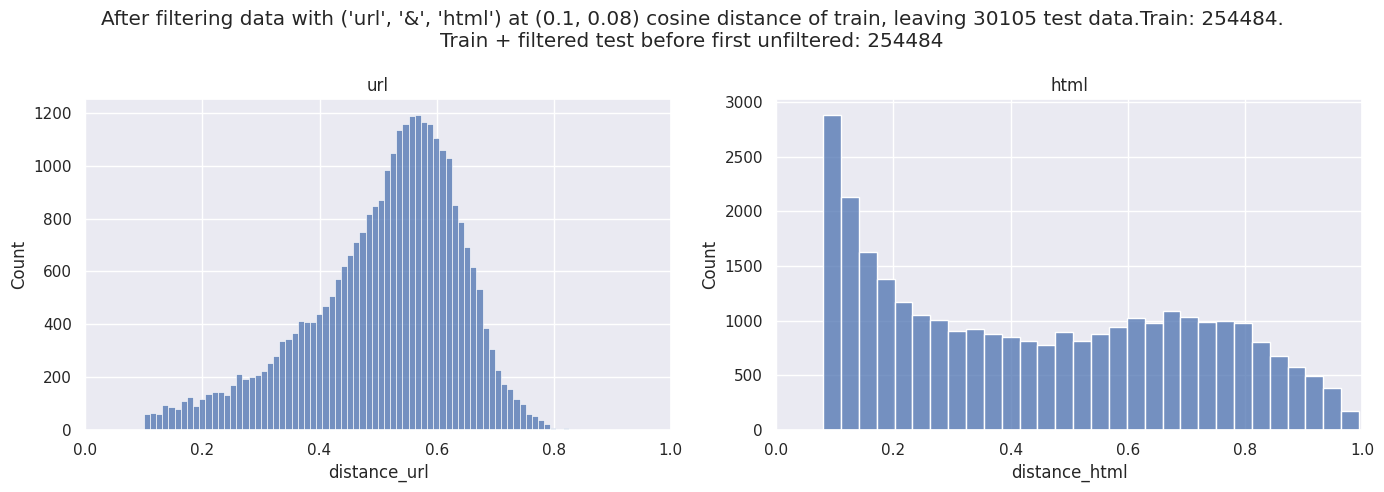

In [ ]:
import importlib
import splitutils
importlib.reload(splitutils)
from splitutils import load_df, show_distributions

class_type = 'benigns'
df, zero_day = load_df(dirs[class_type])
n_total = len(df)
train_ratio = 0.8
nearby_df = show_distributions(class_type, n_total, train_ratio, nn_paths, dist_thresholds)

In [23]:
import pandas as pd

threshs = [0.04, 0.08, 0.12, 0.16]
n_samples = 100
train_size = int(len(df) * 0.8)

samples = None
for thresh in threshs:
    sample_nearby = (
        nearby_df[nearby_df.distance_html <= thresh]
        .sort_values('distance_html', ascending=False)
        .head(n_samples)[['idx', 'nearest_bin_html', 'distance_html']]
    )
    sample_nearby.columns = ['test_idx', 'train_idx', 'distance_html']
    sample_nearby.test_idx = sample_nearby.test_idx + train_size

    sample_nearby['test_json'] = sample_nearby.apply(lambda x: df.loc[x.test_idx, 'sha256'], axis=1)
    sample_nearby['train_json'] = sample_nearby.apply(lambda x: df.loc[x.train_idx, 'sha256'], axis=1)

    sample_nearby['threshold'] = [thresh] * len(sample_nearby)

    if samples is None:
        samples = sample_nearby
    else:
        samples = pd.concat([samples, sample_nearby])
samples = samples.reset_index(drop=True)

samples

,test_idx,train_idx,distance_html,test_json,train_json,threshold
0,314723,102359,0.039995,9f350f8cd988d5979e13c72a1b8ce8c029c3fab899774c...,bde4140ad473c591ee22aca6f6ea4ed946b5c83fe04bf0...,0.04
1,283185,234684,0.039994,3cf5a786aef4848397b5b19774b061aafef5fb9447a081...,f7849208277c43dc23aac6dcb5eb6e114b7f9ada215e51...,0.04
2,260912,143018,0.039991,6a2d2295188c11ed588880082b268d5e111fdb71dfb607...,a621a61da287955c0bec4fe4fbfd3ff439347c06ca8369...,0.04
3,282232,221005,0.039986,9399a55ad8f59dc2ee5ea2dc56461695dfca1e51f9d1a1...,e76c69de01035b7de26a9899b1dda2a0c3b6ee6b430ad1...,0.04
4,284375,218007,0.039980,2807bf30bed9c0c4c11aba09ae15aa26b402e7ae28aa95...,edf8e47c9ca03b76fcc21401e5c8d7cf0ffc69a8f6f734...,0.04
...,...,...,...,...,...,...
395,259085,220310,0.158134,cea015d8b4a25721ba6f54093d77b08edf2bbb043cb276...,ddaa7ee13fafdcb020ef0a2d6ba520d996b0e19ce8248d...,0.16
396,298623,88663,0.158062,db7935de26f57d40d191bf2cfeaf0064d63dc3aaf44a4e...,8729021c05eae8f18b8346bc36dfbd4c1ac24605bf8175...,0.16
397,301303,241276,0.158005,796e0db9521be19838e52f5c1231d807c009f53bbf0d3a...,514083d994a24e9d5599782f1ff5e95d99fe33c690f9db...,0.16
398,310464,204188,0.158001,271e967a1a7dfceb17eadf459654dfd8a49307c5ba737f...,d94d671606fde6bbb206162ea85ec00c3b8f23478905d3...,0.16


In [24]:
import multiprocessing as mp

params = []
for row in samples.iterrows():
    params.append((
        os.path.join(dirs[class_type], row[1].test_json + '.json'), 
        os.path.join(dirs[class_type], row[1].train_json + '.json')
    ))

with mp.Pool(72) as pool:
    lrs = pool.map(get_distance, params)

samples['levenshtein_ratio'] = lrs

samples.to_csv(f'{class_type}.csv')

- Time histograms

In [1]:
import os

splitting_dir = '/home/hgowda/projects/phishing/data/splitting'
paths = {
    'splits':{
        'train': {
            'phishes': os.path.join(splitting_dir, 'splits/train/phishes'),
            'benigns': os.path.join(splitting_dir, 'splits/train/benigns')
        },
        'test': {
            'phishes': os.path.join(splitting_dir, 'splits/test/phishes'),
            'benigns': os.path.join(splitting_dir, 'splits/test/benigns')
        }
    }
}

In [16]:
import json
import multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def load_sample(filename):
    with open(filename, 'r') as f:
        sample = json.load(f)
    return sample

In [28]:
ds_type = 'train'
class_type = 'phishes'

dir = paths['splits'][ds_type][class_type]
files = os.listdir(dir)
filepaths = [os.path.join(dir, x) for x in files]

with mp.Pool(60) as pool:
    data = pool.map(load_sample, filepaths)

df_train = pd.DataFrame(data)
df_train.collect_date = pd.to_datetime(df_train.collect_date)

In [29]:
ds_type = 'test'
class_type = 'phishes'

dir = paths['splits'][ds_type][class_type]
files = os.listdir(dir)
filepaths = [os.path.join(dir, x) for x in files]

with mp.Pool(60) as pool:
    data = pool.map(load_sample, filepaths)

df_test = pd.DataFrame(data)
df_test.collect_date = pd.to_datetime(df_test.collect_date)

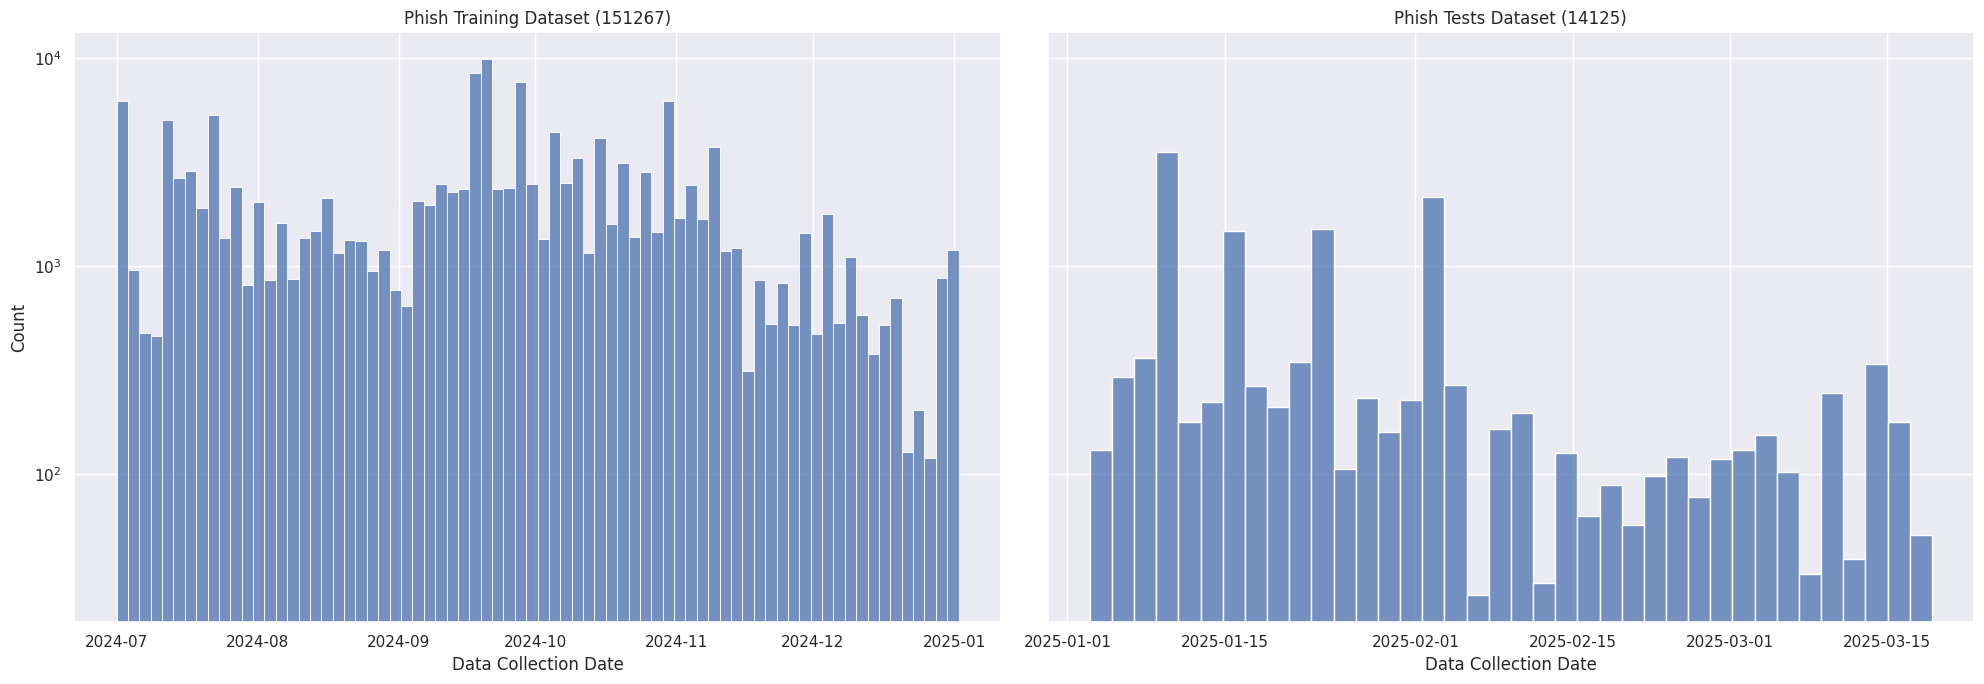

In [32]:
min_train_date = df_train.collect_date.min()
max_train_date = df_train.collect_date.max()
min_test_date = df_test.collect_date.min()
max_test_date = df_test.collect_date.max()

fig, axs = plt.subplots(1, 2, figsize=(20,7), tight_layout=True, sharey=True)
sns.histplot(df_train['collect_date'], ax=axs[0], log=(False, True))
axs[0].set_title(f"Phish Training Dataset ({len(df_train)})")
axs[0].set_xlabel("Data Collection Date")
sns.histplot(df_test.collect_date, ax=axs[1], log=(False, True))
axs[1].set_title(f"Phish Tests Dataset ({len(df_test)})")
axs[1].set_xlabel("Data Collection Date")
plt.show()

In [34]:
ds_type = 'train'
class_type = 'benigns'

dir = paths['splits'][ds_type][class_type]
files = os.listdir(dir)
filepaths = [os.path.join(dir, x) for x in files]

with mp.Pool(60) as pool:
    data = pool.map(load_sample, filepaths)

df_train = pd.DataFrame(data)
df_train.collect_date = pd.to_datetime(df_train.collect_date)

In [33]:
ds_type = 'test'
class_type = 'benigns'

dir = paths['splits'][ds_type][class_type]
files = os.listdir(dir)
filepaths = [os.path.join(dir, x) for x in files]

with mp.Pool(60) as pool:
    data = pool.map(load_sample, filepaths)

df_test = pd.DataFrame(data)
df_test.collect_date = pd.to_datetime(df_test.collect_date)

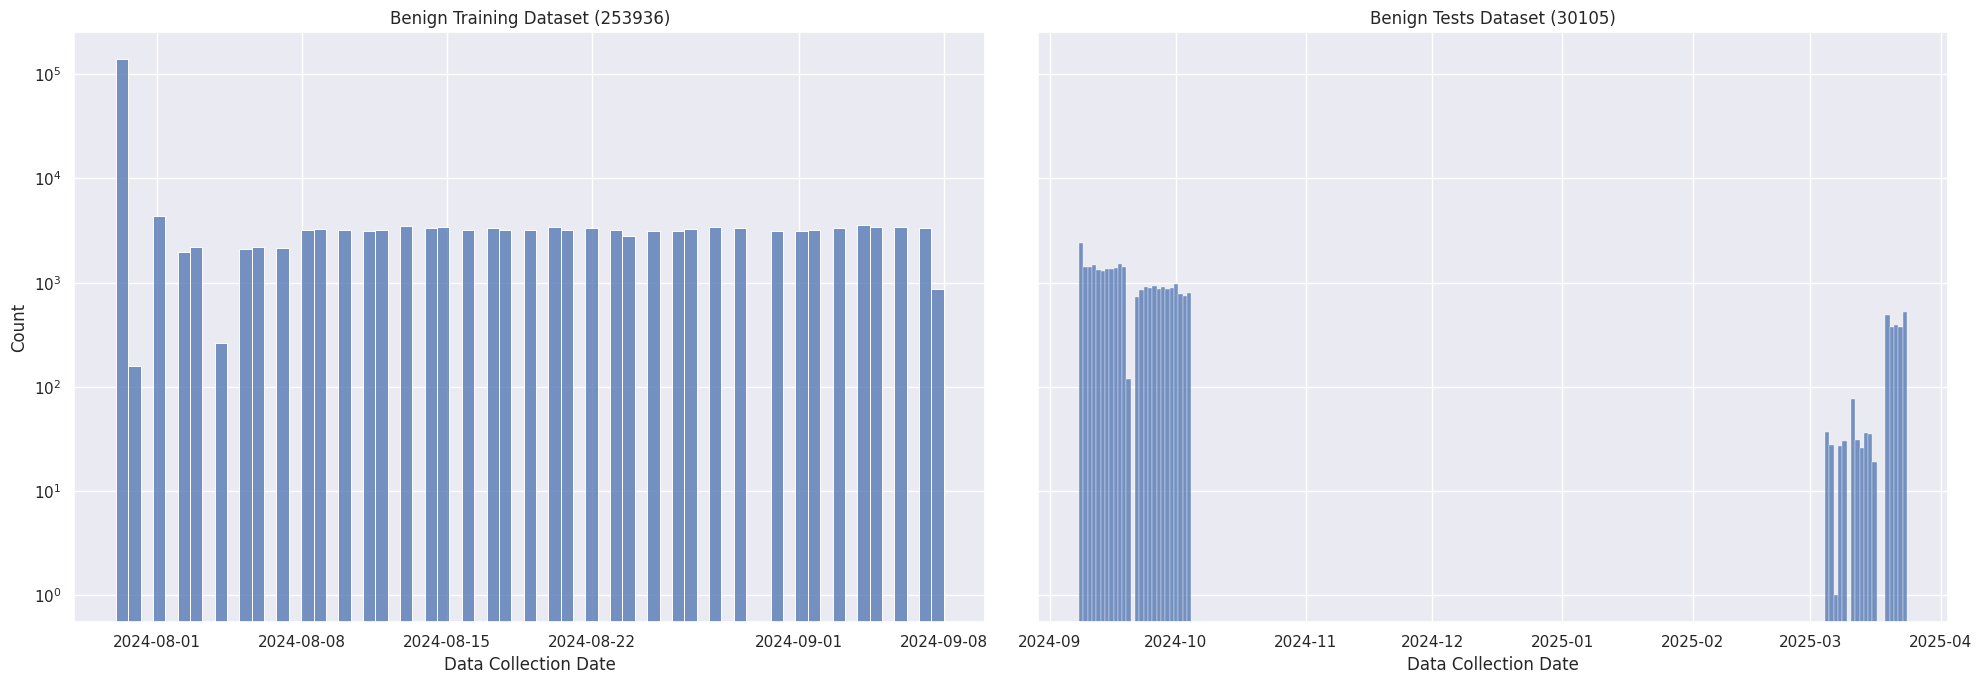

In [ ]:
from datetime import timedelta

min_train_date = df_train.collect_date.min()
next_min_train_date = min_train_date + timedelta(days=1)
max_train_date = df_train.collect_date.max()
min_test_date = df_test.collect_date.min()
max_test_date = df_test.collect_date.max()


fig, axs = plt.subplots(1, 2, figsize=(20,7), tight_layout=True, sharey=True)
sns.histplot(df_train['collect_date'], ax=axs[0], log=(False, True))
axs[0].set_title(f"Benign Training Dataset ({len(df_train)})")
axs[0].set_xlabel("Data Collection Date")
sns.histplot(df_test.collect_date, ax=axs[1], log=(False, True))
axs[1].set_title(f"Benign Tests Dataset ({len(df_test)})")
axs[1].set_xlabel("Data Collection Date")
plt.show()